# Characterizing CRISPR-Cas System in Metagenomic Antibiotic-treated and untreated Samples
#### Libraries

In [1]:
%matplotlib inline
from os import chdir
from pandas import DataFrame,read_csv,Series
from sys import path as spath
spath.append("/mnt/research/germs/shane/antibioticResistance/scripts/")
from CRISPRtools import *
chdir("data")

In [ ]:
metadata = read_csv("Metadata.csv")
metadata = metadata[metadata["Assay Type"].isin(set(['RNA-Seq', 'WGS']))]
metadata.set_index("Run",inplace=True)
metadata.drop(["AvgSpotLen","BioSampleModel","BioSample","BioSampleModel", \
               "Center Name","Consent", "DATASTORE filetype","DATASTORE provider","DATASTORE region",\
               "geo_loc_name","host_body_product","chem_administration","env_feature",'sub_species','host_life_stage',\
              "host_last_meal","samp_mat_process","material","host_growth_cond","project_name","investigation_type","label","Instrument",\
              "host_taxid",'host_body_temp', 'lat_lon', 'LibraryLayout','LibrarySelection', 'LibrarySource','Platform','ReleaseDate',\
              'samp_store_temp','BIOME','env_package','feature','host_common_name','env_biome', 'env_material', 'host','SRA Study',],inplace=True,axis=1)
treated = metadata[metadata["perturbation"]=="medicated"]
untreated = metadata[metadata["perturbation"]=="non-medicated"]
print(treated.shape,untreated.shape,metadata.shape)
metadata.head()

#### Characterize CRISPR arrays

In [2]:
untreadCRISPRs = PilerCRReader("assemblies/UntreatedAssembly_filter_gt2k.pcr")
treadCRISPRs = PilerCRReader("assemblies/TreatedAssembly_filter_gt2k.pcr")

In [4]:
untreadCRISPRs.nArrays,treadCRISPRs.nArrays

(54, 37)

In [5]:
untreatedCRs = []
for seqID,crisprs in untreadCRISPRs.items(): untreatedCRs.append(len(crisprs.repeatCoords))
treatedCRs = []
for seqID,crisprs in treadCRISPRs.items(): treatedCRs.append(len(crisprs.repeatCoords))

combined = treatedCRs + untreatedCRs

treatmentType = ['Antibiotic Treated']*len(treatedCRs)
treatmentType += ['Normal Diet']*len(untreatedCRs)

crDict = {"# of crRNAs":combined,"Sample Type":treatmentType}
df = DataFrame(crDict)


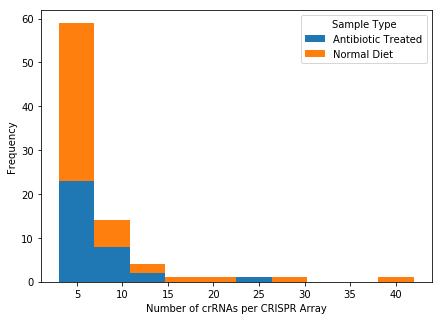

In [6]:
ax = df.pivot(columns="Sample Type")["# of crRNAs"].plot(kind = 'hist', stacked=True,figsize=(7,5))
ax.set_xlabel("Number of crRNAs per CRISPR Array");
fig = ax.get_figure()
fig.savefig("images/CrRNAsPerCRISPR.eps",)

In [15]:
untreatedRepeats =set()
allRepeats = []
for seqID,crisprs in untreadCRISPRs.items(): 
    untreatedRepeats=untreatedRepeats.union(crisprs.consensusRepeats)
    for seq in crisprs.consensusRepeats: allRepeats.append(seq)
treatedRepeats =set()
for seqID,crisprs in treadCRISPRs.items(): 
    treatedRepeats=treatedRepeats.union(crisprs.consensusRepeats)   
    for seq in crisprs.consensusRepeats: allRepeats.append(seq)
    
len(untreatedRepeats),len(treatedRepeats),len(treatedRepeats.intersection(untreatedRepeats)),len(allRepeats)
#     untreatedCRs.append(len(crisprs.repeatCoords))

(51, 36, 3, 3, 89)

In [20]:
intersect = 0
covered = set()
for seq1 in untreatedRepeats:
    for seq2 in treatedRepeats: 
        if seq2 in covered:continue
        if seq1==seq2 or RC(seq1)==seq2 or seq1.find(seq2) != -1 or seq1.find(RC(seq2)) != -1 or seq2.find(seq1) != -1 or seq2.find(RC(seq1)) != -1: covered.add(seq2)

len(covered)

8

In [14]:
allRepeats.sort(key=len)
allRepeats

['CCTGTGTAGCCGCAGGA',
 'CGGCGGCATCGTCGGCT',
 'GAGTGCGCATATTGAAA',
 'TGTTTCACGTGAAACAT',
 'GGGAGCGTGGATTGAAAC',
 'GTGGGCGGCATCGCGGGC',
 'AACGGCAACTGGTGGATAGG',
 'CAAATGTTTCACGTGAAACAT',
 'CAAATGTTTCACGTGAAACAT',
 'GAACGTTCCGCCGTTGATTGT',
 'CCTATCCACCAGTTGCCGTTATT',
 'GGTGTAACCGGCAGCGGCGACAT',
 'TCCACTACAACAAGGATTAAGAC',
 'CCGCATTCGGGGCAGAATTTGCCG',
 'GGTAAAATATCAAACTGCTATGCAT',
 'GGATCACCCCCGCATGTGCGGGGAAAAG',
 'GGATCACCCCCGCGTATGCGGGGAAAAG',
 'GTTGACCGCCGCATAGGCGGCTTAGAAA',
 'TTTCTAAGCTGCCTATGCGGCAGTTAAC',
 'AGGATCACCCCTGCGTGTGCAGGGAAAAG',
 'GTTGTACCGTACCTAAGAGGAATTGACAC',
 'ATTTACATTCCAATATGGTTCTACTTCAAT',
 'ATTTCAATTCCATAAAGGTACGATTAAAAC',
 'CTTTAAATTCCAATCTGTTTCTATTAATAC',
 'GATAAACAGTAACAAGAGTTGTATTGAAAC',
 'GATAAACAGTAACAAGAGTTGTATTGAAAC',
 'GTTTCAATACAACTCTTGTTACTGTTTATC',
 'GTTTCAATCGCACCTTTATGGAATTGAAAG',
 'GTTTCAATCGCACCTTTATGGAATTGAAAG',
 'AATTGGGATGTGTCTAATGTGAAAGATATGT',
 'ATTTCAATCCACGCTCCCTCACGGGAGCGAC',
 'GTCGCCCCCGTATGGGGGCGTGGATTGAAAT',
 'GTCGCTCCCGCGAGGGAGCGTGGATTGAAA

In [ ]:
from pandas import concat
from numpy import zeroes
df = DataFrame(columns=)

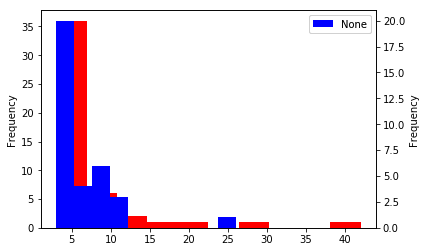

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 1.0

untreatedCRs.plot(kind='hist', color='red', ax=ax)
treatedCRs.plot(kind='hist', color='blue', ax=ax2)
plt.
# ax.set_ylabel('')
# plt.set_xlabel('Number of crRNAs / CRISPR array')

plt.show()

In [ ]:
plt.l

count    48.000000
mean      6.687500
std       7.032315
min       3.000000
25%       3.000000
50%       4.500000
75%       6.250000
max      42.000000
dtype: float64


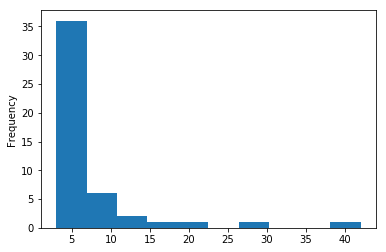

In [7]:
untreatedCRs=Series(untreatedCRs)
treatedCRs=Series(treatedCRs)
untreatedCRs.plot.hist();
print(untreatedCRs.describe())

# Data Prep

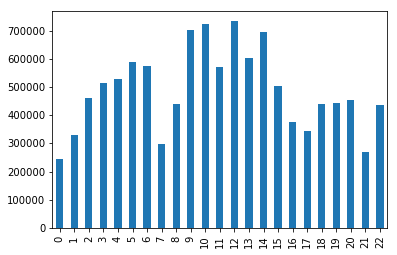

In [34]:
dist=[]
for row in treated.index:
    nlines = len(open("data/samples/treated/%s.fastq" % (row)).readlines())
#     print(nlines)
    dist.append(nlines)

# for row in untreated.index:
#     fh.write(row+'\n')
#     if path.exists("data/samples/"+row+".fastq"):
#         print(row,path.exists("data/samples/"+row+".fastq"))
#         system("mv data/samples/%s.fastq data/samples/untreated/" %(row))
#         count+=1
dist = Series(dist)
dist.plot.bar();

In [3]:
from os import system,path
count = 0
fh = open("data/SampleManifestWGS_Treated.txt",'w')
for row in treated.index:
    fh.write(row+'\n')
#     if path.exists("data/samples/"+row+".fastq"):
#         system("mv data/samples/%s.fastq data/samples/treated/"%(row))
#         print(row,path.exists("data/samples/"+row+".fastq"))
#         count+=1
fh.close()
fh = open("data/SampleManifestWGS_Untreated.txt",'w')
for row in untreated.index:
    fh.write(row+'\n')
#     if path.exists("data/samples/"+row+".fastq"):
#         print(row,path.exists("data/samples/"+row+".fastq"))
#         system("mv data/samples/%s.fastq data/samples/untreated/" %(row))
#         count+=1
fh.close()
# count

In [2]:
from sys import path as spath
spath.append("/mnt/research/germs/shane/antibioticResistance/scripts/")
from CRISPRtools import *
from os import chdir

chdir("/mnt/research/germs/shane/antibioticResistance/data")


In [2]:
%%bash
ls -alh assemblies

total 2.5G
drwxr-s--- 2 dooleys1 germs 8.0K Sep 16 21:49 .
drwxr-s--- 6 dooleys1 germs 8.0K Sep 16 21:26 ..
-rw-r----- 1 dooleys1 germs 882M Sep 16 20:58 TreatedAssembly.fa
-rw-r----- 1 dooleys1 germs 256M Sep 16 21:40 TreatedAssembly_filter_gt2k.fa
-rw-r----- 1 dooleys1 germs  58K Sep 16 21:48 TreatedAssembly_filter_gt2k.pcr
-rw-r----- 1 dooleys1 germs 1.1G Sep 16 11:59 UntreatedAssembly.fa
-rw-r----- 1 dooleys1 germs 318M Sep 16 21:46 UntreatedAssembly_filter_gt2k.fa
-rw-r----- 1 dooleys1 germs  85K Sep 16 21:49 UntreatedAssembly_filter_gt2k.pcr
-rw-r----- 1 dooleys1 germs 521K Sep 16 12:10 UntreatedAssembly.mnout


count    34.000000
mean      6.176471
std       4.365641
min       3.000000
25%       3.250000
50%       5.000000
75%       8.000000
max      26.000000
dtype: float64


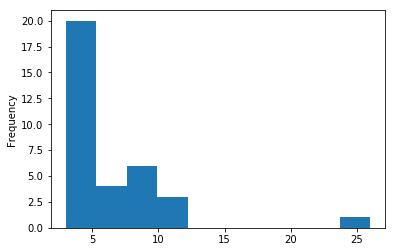

In [8]:
treatedCRs.plot.hist();
print(treatedCRs.describe())

In [ ]:
# What is the coverage over the CRISPRs

In [41]:
from glob import glob
from os import chdir, system
chdir("/mnt/gs18/scratch/users/dooleys1/antibioticResistance/trimmed")
treated = glob("treated/*.gz")
untreated = glob("untreated/*.gz")
chdir("combined")
for samp in treated: system("ln -s ../%s %s" % (samp,samp.replace("treated/","")))
for samp in untreated: system("ln -s ../%s %s" % (samp,samp.replace("untreated/","")))
